 

**This is a python notebook for result visualization - Project1 - CSC527**  
**Author: Lan Nguyen**




Function for double moon plotting and perceptron

In [ ]:
from random import random
import matplotlib.pyplot as plt
from matplotlib.pylab import *
import math
import numpy as np


def moon(num_points, distance, radius, width):
    '''
    Function to create the double moon
    '''

    points = num_points

    x1 = [0 for _ in range(points)]
    y1 = [0 for _ in range(points)]
    x2 = [0 for _ in range(points)]
    y2 = [0 for _ in range(points)]

    for i in range(points):
        d = distance
        r = radius
        w = width
        a = random() * math.pi
        x1[i] = math.sqrt(random()) * math.cos(a) * (w / 2) + (
                    (-(r + w / 2) if (random() < 0.5) else (r + w / 2)) * math.cos(a))
        y1[i] = math.sqrt(random()) * math.sin(a) * (w) + (r * math.sin(a)) + d

        a = random() * math.pi + math.pi
        x2[i] = (r + w / 2) + math.sqrt(random()) * math.cos(a) * (w / 2) + (
            (-(r + w / 2)) if (random() < 0.5) else (r + w / 2)) * math.cos(a)
        y2[i] = -(math.sqrt(random()) * math.sin(a) * (-w) + (-r * math.sin(a))) - d
    return ([x1, x2, y1, y2])



def sgnFunc(x, w):
    '''
    Signum function, return 1 if sum(w*x)+b >= 0 else return -1
    '''

    activation = w[0]
    for i in range(2):
        activation += sum([i * j for i, j in zip(w[1:],x[0:2])])
    if activation >= 0:
        return 1
    else:
        return -1


def updateWeight(x, learningRate, error, w):
    '''
    Update function for weights
    w(n+1) = w(n) + learningRate * (d(n) - y(n)) * x(n)
    iterError is (d(n) - y(n))
    '''

    return [i + learningRate * error * j for i, j in zip(w[1:],x[0:2])]

def train(data, learningRate, w):
    """
    Trains all the vector in data.
    """

    epochs = 0
    MSE = []
    while True:
        sumError = 0.0
        for x in data:

            predicted = sgnFunc(x, w)
            expected = x[2]
          
            if expected != predicted:
                
                error = expected - predicted
                w[1:] = updateWeight(x, learningRate, error, w)
                w[0] = w[0] + learningRate*error
                sumError += error**2
        epochs += 1
        MSE.append(sumError/50)
        if epochs >= 50 or sumError == 0.0:
            break
    #plt.close()
    return w, MSE

def getDataSet(num_points, distance, radius, width):
    '''
    Add third element as desired output in each data point
    Return the dataset.
    '''

    x1, x2, y1, y2 = moon(num_points, distance, radius, width)
    data = []
    data.extend([x1[i], y1[i], 1] for i in range(num_points))
    data.extend([x2[i], y2[i], -1] for i in range(num_points))
    return data

def draw_line(w, data):
    '''
    Draw decision boundary
    w0 + w1x + w2y = 0 => y = -(w0 + w1x)/w2
    '''

    x = np.linspace(np.amin(data),np.amax(data),100)

   # x = np.linspace(-10,10, 100)
    y = -(w[0] + x*w[1])/w[2]
    plt.plot(x, y, '--k',label="DB")


Declare the weights, bias and learning rate

In [ ]:
#Initial the bias as 0.01 and vector w as [bias, 0, 0]
bias = [0.1]
w = bias + [0 for _ in range(2)]

#Initial learningRate as 0.01
learningRate = 0.1

Task1: Classification using perceptron with distance = 1

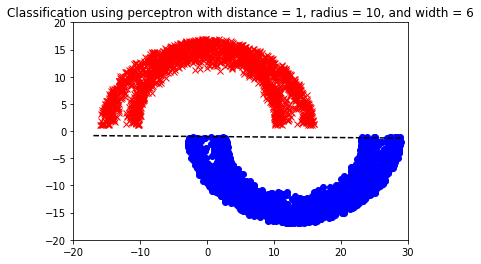

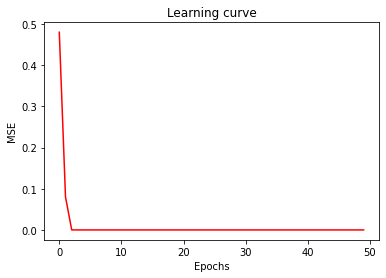

In [ ]:
#Create dataset for training
dataTrain = getDataSet(1000, 1, 10, 6)

#Create dataset for testing
dataTest = getDataSet(2000, 1, 10, 6)

#Train the model
result, MSE = train(dataTrain, learningRate, w)

#Draw all the points in testing dataset
for x in dataTest:
    plt.figure(1)
    predict = sgnFunc(x, result)
    if predict == 1:
        plt.plot(x[0], x[1], marker='x', color='r',label="bl")
    else:
        plt.plot(x[0], x[1], marker='o', color='b',label='rd')


#Draw decision boundary
plt.figure(1)
draw_line(result, dataTest)
plt.axis([-20, 30, -20, 20])
plt.title("Classification using perceptron with distance = 1, radius = 10, and width = 6")
plt.show()


iters = [i for i in range(50)]
if len(MSE) < 50:
  for i in range(50-len(MSE)):
    MSE.append(0)

plt.figure(4)
plt.plot(iters, MSE, color="red")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Learning curve")
plt.savefig("LearningCurve1.png")
plt.show()

Task2: Classification using perceptron with distance = 0

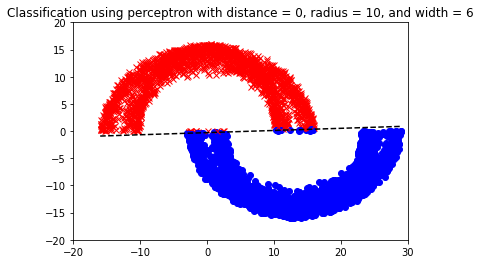

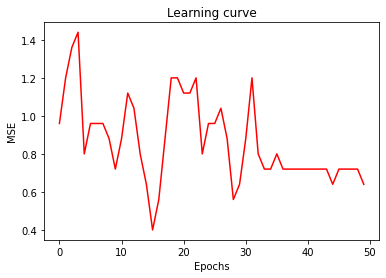

In [ ]:
#Create dataset for training
dataTrain1 = getDataSet(1000, 0, 10, 6)

#Create dataset for testing
dataTest1 = getDataSet(2000, 0, 10, 6)

#Train the model
result1, MSE1 = train(dataTrain1, learningRate, w)

#Draw all the points in testing dataset
for x in dataTest1:
    plt.figure(3)
    predict = sgnFunc(x, result1)
    if predict == 1:
        plt.plot(x[0], x[1], marker='x', color='r',label="bl")
    else:
        plt.plot(x[0], x[1], marker='o', color='b',label='rd')


#Draw decision boundary
plt.figure(3)
draw_line(result1, dataTest1)
plt.axis([-20, 30, -20, 20])
plt.title("Classification using perceptron with distance = 0, radius = 10, and width = 6")
plt.show()

iters = [i for i in range(50)]
if len(MSE1) < 50:
  for i in range(50-len(MSE1)):
    MSE1.append(0)

plt.figure(4)
plt.plot(iters, MSE1, color="red")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Learning curve")
plt.savefig("LearningCurve0.png")
plt.show()

Extra: Using this part to modify all the aprameters (number of points for train/test, bias, distance, learning rate)

Enter number of points for training dataset: 1000
Enter number of points for testing dataset: 1000
Enter the distance between 2 moons: -3
Enter the learning rate: 0.01
Enter the bias: 0.2


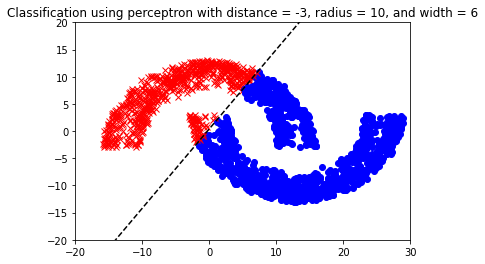

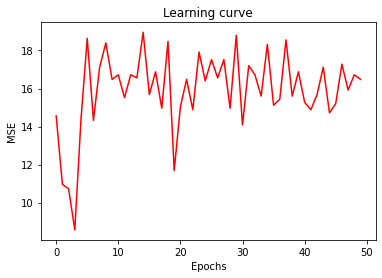

In [ ]:
numOfPoints_Train = input("Enter number of points for training dataset: ")
numOfPoints_Test  = input("Enter number of points for testing dataset: ")

distance = input("Enter the distance between 2 moons: ")
learningRate = input("Enter the learning rate: ")
bias = input("Enter the bias: ")

dataTrain2 = getDataSet(int(numOfPoints_Train), int(distance), 10, 6)

#Create dataset for testing
dataTest2 = getDataSet(int(numOfPoints_Test), int(distance), 10, 6)

#Train the model
result2, MSE2 = train(dataTrain2, float(learningRate), w)

#Draw all the points in testing dataset
for x in dataTest2:
    plt.figure(5)
    predict = sgnFunc(x, result2)
    if predict == 1:
        plt.plot(x[0], x[1], marker='x', color='r',label="bl")
    else:
        plt.plot(x[0], x[1], marker='o', color='b',label='rd')


#Draw decision boundary
plt.figure(5)
draw_line(result2, dataTest2)
plt.axis([-20, 30, -20, 20])
plt.title("Classification using perceptron with distance = " +distance+ ", radius = 10, and width = 6")
plt.show()

iters = [i for i in range(50)]
if len(MSE2) < 50:
  for i in range(50-len(MSE2)):
    MSE2.append(0)

plt.figure(6)
plt.plot(iters, MSE2, color="red")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Learning curve")
plt.savefig("LearningCurve_Modified.png")
plt.show()